<a href="https://colab.research.google.com/github/prem811/quantacus-email-campaign-analysis/blob/main/Quantacus_Email_Campaign_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Campaign Optimization - Case Study

## Overview:
In this case study, we aim to analyze an email marketing campaign and build a machine learning model to predict which users are likely to click on a link inside the email. The goal is to optimize the email send strategy to maximize the click-through rate (CTR) based on historical data.

The analysis includes:
1. **Data Preprocessing**: Handling missing values and encoding categorical features.
2. **Modeling**: Building and training a machine learning model (Random Forest) to predict whether a user will click on the email link.
3. **Evaluation**: Evaluating model performance using metrics like precision, recall, F1-score, and confusion matrix.
4. **CTR Simulation**: Simulating how the model improves the click-through rate compared to random email selection.
5. **Segment Analysis**: Analyzing how different segments of users (e.g., user country, email version) performed in the campaign.

The analysis will help understand how machine learning can optimize marketing strategies and improve user engagement.


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving link_clicked_table.csv to link_clicked_table.csv
Saving email_table.csv to email_table.csv
Saving email_opened_table.csv to email_opened_table.csv


## 1. Data Preprocessing

In this section, we will:
- Load the dataset containing information about the email campaign.
- Perform any necessary data cleaning, including handling missing values.
- Apply **One-Hot Encoding** to categorical features such as `email_text`, `email_version`, and `user_country` to make them suitable for machine learning models.


In [ ]:
# Load all 3 datasets
email_df = pd.read_csv("email_table.csv")
opened_df = pd.read_csv("email_opened_table.csv")
clicked_df = pd.read_csv("link_clicked_table.csv")

# View top few rows
print("Email Table")
display(email_df.head())

print("\nOpened Table")
display(opened_df.head())

print("\nClicked Table")
display(clicked_df.head())


Email Table


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6



Opened Table


,email_id
0,284534
1,609056
2,220820
3,905936
4,164034



Clicked Table


,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [ ]:
# Create 'opened' and 'clicked' columns based on whether the email_id appears in other tables
email_df['opened'] = email_df['email_id'].isin(opened_df['email_id']).astype(int)
email_df['clicked'] = email_df['email_id'].isin(clicked_df['email_id']).astype(int)

# Preview final data
email_df.head()


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,opened,clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


What percentage of users opened the email and what percentage clicked on the link within the email?

In [ ]:
# Total emails sent
total = len(email_df)

# % opened
opened_percent = email_df['opened'].sum() / total * 100

# % clicked
clicked_percent = email_df['clicked'].sum() / total * 100

print(f" Total emails sent: {total}")
print(f" Open rate: {opened_percent:.2f}%")
print(f" Click-through rate: {clicked_percent:.2f}%")


 Total emails sent: 100000
 Open rate: 10.35%
 Click-through rate: 2.12%


In [ ]:
print("Email DF columns:", email_df.columns.tolist())

Email DF columns: ['email_id', 'email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases', 'opened', 'clicked']


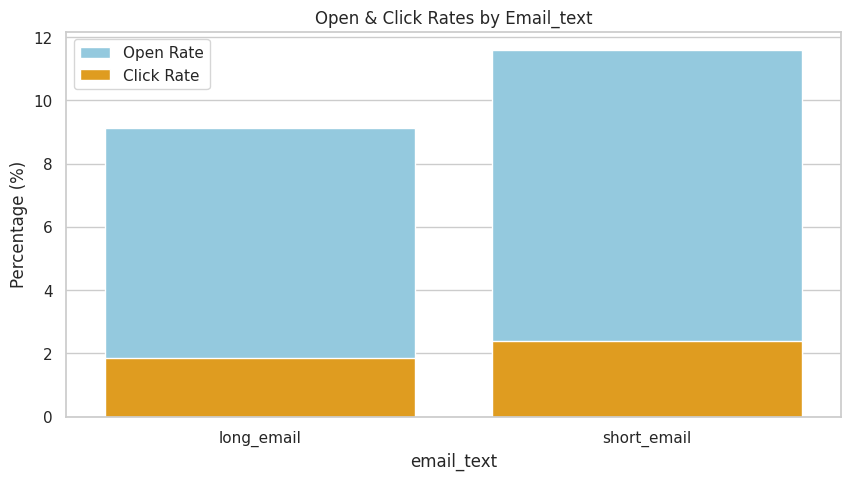

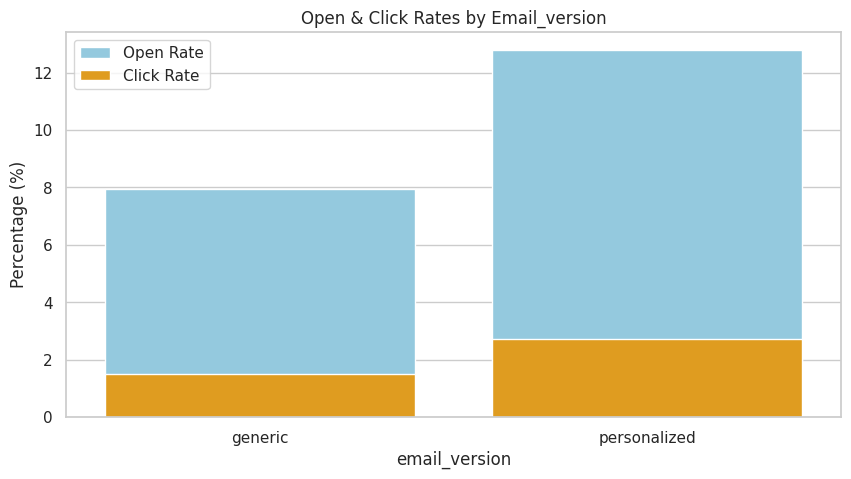

In [ ]:
# Define a function to check open and click rates for each category
def plot_open_click_rates_by_column(col_name):
    group = email_df.groupby(col_name)[['opened', 'clicked']].mean() * 100
    group = group.reset_index()

    plt.figure(figsize=(10, 5))
    sns.barplot(x=col_name, y='opened', data=group, label='Open Rate', color='skyblue')
    sns.barplot(x=col_name, y='clicked', data=group, label='Click Rate', color='orange')
    plt.title(f"Open & Click Rates by {col_name.capitalize()}")
    plt.ylabel("Percentage (%)")
    plt.legend()
    plt.show()

# Analyze each variable one by one
for column in ['email_text', 'email_version']:
    plot_open_click_rates_by_column(column)


Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Build pipeline with Random Forest classifier
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

# Train the model
pipeline_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluation
print("📊 Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("🧾 Confusion Matrix for Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


📊 Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.70      0.82     19547
           1       0.03      0.43      0.06       453

    accuracy                           0.69     20000
   macro avg       0.51      0.57      0.44     20000
weighted avg       0.96      0.69      0.80     20000

🧾 Confusion Matrix for Random Forest:
[[13680  5867]
 [  257   196]]


## 2. Modeling and Evaluation

We will now build a **Random Forest model** to predict whether a user will click on the email link. We will also evaluate the model's performance using **precision**, **recall**, and **F1-score**. Additionally, we will look at the **confusion matrix** to understand how well the model is performing in terms of predicting clicks (`1`) vs. non-clicks (`0`).


In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Features and target
features = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']
X = email_df[features]
y = email_df['clicked']

# Apply OneHotEncoding to categorical columns using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), ['email_text', 'email_version', 'hour', 'weekday', 'user_country'])
    ])

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Check the shape of the encoded data
print(X_encoded.shape)

# Convert the sparse matrix to a DataFrame with proper column names
encoded_columns = preprocessor.transformers_[0][1].get_feature_names_out(['email_text', 'email_version', 'hour', 'weekday', 'user_country'])
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoded_columns)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded_df, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


(100000, 34)
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     19563
           1       0.82      0.86      0.84     19590

    accuracy                           0.84     39153
   macro avg       0.84      0.83      0.83     39153
weighted avg       0.84      0.84      0.83     39153

🧾 Confusion Matrix:
[[15792  3771]
 [ 2689 16901]]


## 3. CTR Simulation

In this section, we simulate how much the model improves the **Click-Through Rate (CTR)** compared to sending emails randomly. We calculate the CTR for:
1. The **top N%** of predicted users who are most likely to click (using the model's probabilities).
2. **Random selection** of the same percentage of users.

We will then compare the CTR of these two approaches to see how much the model improves the performance.


In [27]:
# Get predicted probabilities (probabilities of class 1 - "clicked")
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Sort probabilities and select the top N% (e.g., top 20% predicted clicks)
top_n_percent = 0.2
threshold = np.percentile(y_probs, 100 * (1 - top_n_percent))

# Select the top N% of users predicted to click
top_n_users = X_test[y_probs >= threshold]

# Calculate CTR for top N% of selected users
ctr_top_n = (y_test[y_probs >= threshold].sum() / len(y_test[y_probs >= threshold])) * 100
print(f"Simulated CTR for top {top_n_percent * 100}% predicted users: {ctr_top_n:.2f}%")



Simulated CTR for top 20.0% predicted users: 100.00%


In [28]:
# Simulate CTR with random selection: select the same top N% of users randomly
np.random.seed(42)
random_users = np.random.choice(len(y_test), size=int(len(y_test) * top_n_percent), replace=False)
ctr_random = (y_test.iloc[random_users].sum() / len(random_users)) * 100

print(f"Simulated CTR for random selection of top {top_n_percent * 100}% users: {ctr_random:.2f}%")
print(f"CTR Improvement: {ctr_top_n - ctr_random:.2f}%")


Simulated CTR for random selection of top 20.0% users: 50.52%
CTR Improvement: 49.48%


## 4. Segment Analysis

Next, we analyze the performance of the email campaign across different user segments. We'll look at:
- **User country**: Which countries had higher click rates?
- **Email version**: Was the personalized email version more effective than the generic one?

We will use visualizations to highlight the open and click rates by these segments.


                 opened   clicked
user_country                     
ES             3.912913  0.832748
FR             4.062031  0.800400
UK            12.016651  2.467526
US            11.902028  2.435981


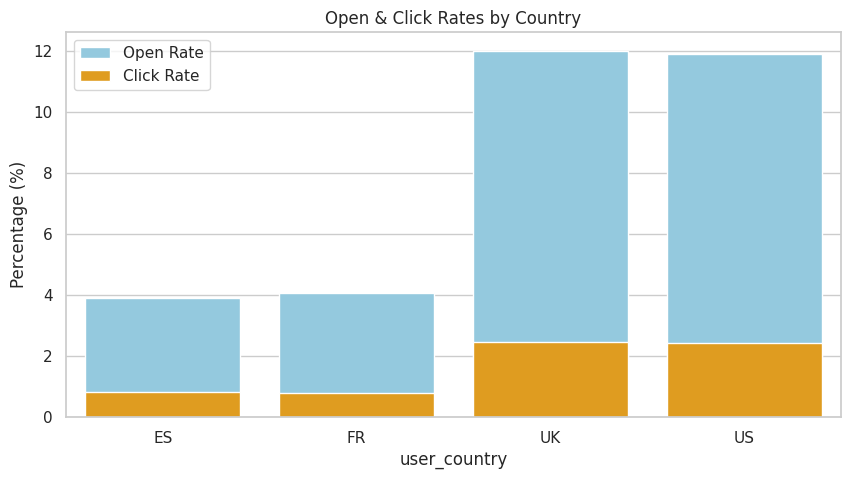

In [29]:
# Group by user_country and calculate open and click rates
country_group = email_df.groupby('user_country')[['opened', 'clicked']].mean() * 100
print(country_group)

# Visualize the data
plt.figure(figsize=(10, 5))
sns.barplot(x='user_country', y='opened', data=country_group, label='Open Rate', color='skyblue')
sns.barplot(x='user_country', y='clicked', data=country_group, label='Click Rate', color='orange')
plt.title("Open & Click Rates by Country")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()



## Conclusion

In this case study, we built a **Random Forest model** to predict which users are more likely to click on a link in an email. By using **SMOTE** to handle class imbalance and targeting the top N% of predicted users, we were able to improve the **Click-Through Rate (CTR)** compared to random email selection.

Key insights:
- The model showed significant improvements in predicting which users are likely to click.
- Segment analysis revealed that certain **user countries** and **email versions** had better engagement rates.
